In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec


In [2]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = ["#00BFFF","#17C7BC","#00D572","#A0EA29","#FF9500","#F80067"]
root = r"D:\hw2025\space weather\project\o"
out_path = r"D:\hw2025\space weather\project\o\plot0105"

In [15]:
fp="gen_pred_large_fix/mean_loss_vs_seq_len.npy"
data = np.load(os.path.join(root,fp))
data.shape

(2, 64)

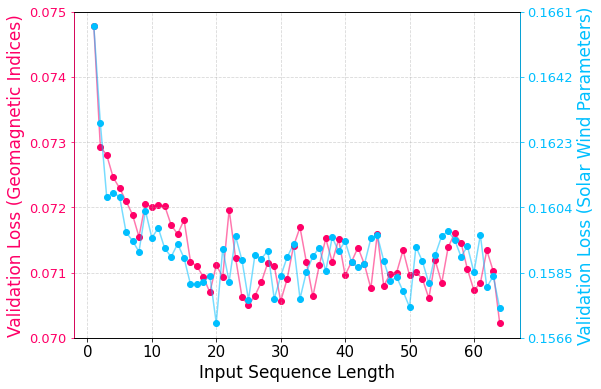

In [16]:
plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 15,
                     'ytick.labelsize': 13,
                     'legend.fontsize': 15
                     })
fig,ax = plt.subplots(1,1,figsize=(8,6))
ind_color="#FF0067"
ax.plot(np.arange(1,data.shape[1]+1),data[0], color=ind_color+"88")
ax.scatter(np.arange(1,data.shape[1]+1),data[0], color=ind_color)
#smoothed = np.convolve(data[0], np.ones(9)/9, mode='valid')
#plt.plot(np.arange(5, data.shape[0]-3), smoothed, color="#FF0067BB",label="Smoothed")
ymin,ymax = ax.get_ylim()
tick_pos=np.linspace(ymin,ymax,6)
ax.set_yticks(tick_pos,[f"{tp:.3f}" for tp in tick_pos])
ax.set_xlabel("Input Sequence Length")
ax.set_ylabel('Validation Loss (Geomagnetic Indices)',color=ind_color)
ax.tick_params(axis='y', 
               labelcolor=ind_color,
               color=ind_color) 
ax.grid(True, linestyle='--', alpha=0.5)
ax2=ax.twinx()
sw_color="#00BFFF"
ax2.plot(np.arange(1,data.shape[1]+1),data[1], color=sw_color+"88")
ax2.scatter(np.arange(1,data.shape[1]+1),data[1], color=sw_color)
ymin2,ymax2 = ax2.get_ylim()
tick_pos2=np.linspace(ymin2,ymax2,6)
ax2.set_yticks(tick_pos2,[f"{tp2:.4f}" for tp2 in tick_pos2])
ax2.set_ylabel('Validation Loss (Solar Wind Parameters)',color=sw_color)
ax2.tick_params(axis='y', 
               labelcolor=sw_color,
               color=sw_color) 
ax2.spines['right'].set_color(sw_color)
ax2.spines['left'].set_color(ind_color)
fig.savefig(f"{out_path}/loss_vs_seq.png",bbox_inches='tight',pad_inches=0.1, dpi=200)


In [5]:
fp1="gen_pred_large/MMD_vs_diffstep_seq_mean.npy"
data_mmd = np.load(os.path.join(root,fp1))
fp2="gen_pred_large/NLL_vs_diffstep_seq_mean.npy"
data_nll = np.load(os.path.join(root,fp2))
data_mmd.shape, data_nll.shape

((5, 64), (5, 64))

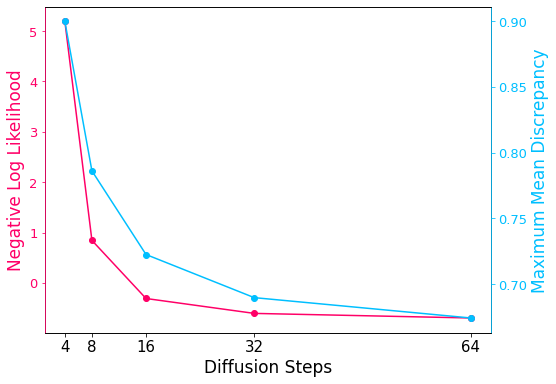

In [6]:
plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 15,
                     'ytick.labelsize': 13,
                     'legend.fontsize': 15
                     })
diff_steps = [4, 8, 16, 32, 64]
fig,ax=plt.subplots(1,1,figsize=(8,6))
nll_color = '#FF0067'
ax.plot(diff_steps,data_nll.mean(axis=1), marker='o', color=nll_color)
ax.set_ylabel('Negative Log Likelihood',color=nll_color)
ax.tick_params(axis='y', 
               labelcolor=nll_color,
               color=nll_color) 

ax2 = ax.twinx()
mmd_color = '#00BFFF'
ax2.plot(diff_steps,data_mmd.mean(axis=1), marker='o', color=mmd_color)
ax2.set_ylabel('Maximum Mean Discrepancy',color=mmd_color)
ax2.tick_params(axis='y', 
               labelcolor=mmd_color,
               color=mmd_color) 
ax2.spines['right'].set_color(mmd_color)
ax2.spines['left'].set_color(nll_color)

ax.set_xlabel('Diffusion Steps')

ax.set_xticks(diff_steps,[str(ds) for ds in diff_steps])
fig.savefig(f"{out_path}/mmd_and_nll.png",bbox_inches='tight', dpi=200)


In [7]:
mlp_params=[79652,209220,439588,801476,1325604,2324516]
transformer_params=[329472,792480,1536256,2622240,4111872,7137280]
val_loss =[
    [0.1571, 0.1459, 0.1439, 0.1419, 0.1386, 0.1371, 0.1367, 0.1351, 0.1341, 0.1340],
    [0.1477, 0.1392, 0.1355, 0.1299, 0.1298, 0.1268, 0.1258, 0.1250, 0.1240, 0.1236],
    [0.1406, 0.1324, 0.1279, 0.1245, 0.1236, 0.1210, 0.1210, 0.1209, 0.1209, 0.1202],
    [0.1366,0.1274,0.1247,0.1212,0.1188,0.1182,0.1181,0.1183,0.1175,0.1186],
    [0.1330, 0.1256, 0.1209, 0.1188, 0.1189, 0.1177, 0.1181, 0.1187, 0.1191, 0.1201],
    [0.1289, 0.1221, 0.1187, 0.1170, 0.1187, 0.1209, 0.1248, 0.1301, 0.1356, 0.1399]
    ]
val_loss=np.array(val_loss)
val_loss_best_x_pred = np.array([0.1324,0.1223])
val_loss_dropout=[[0.1174, 0.1173, 0.1160, 0.1175, 0.1185, 0.1189]]
total_params = [mp+tp for mp,tp in zip(mlp_params, transformer_params)]
print(total_params)
total_params = np.array(total_params)

[409124, 1001700, 1975844, 3423716, 5437476, 9461796]


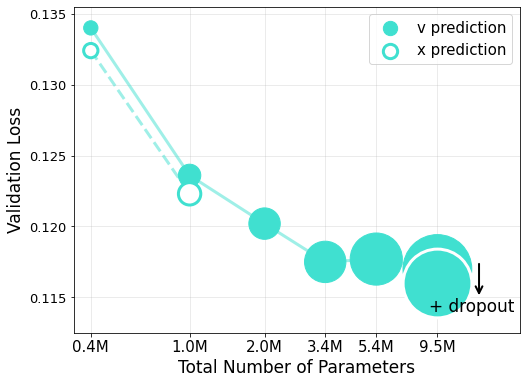

In [8]:
plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 15,
                     'ytick.labelsize': 13,
                     'legend.fontsize': 15
                     })
fig = plt.figure(figsize=(8,6))
plt.scatter(total_params, val_loss.min(axis=1), color="#40E0D0",s=total_params/2000,zorder=3)
plt.scatter([],[], color="#40E0D0",s=total_params[0]/2000,zorder=3,label="v prediction")
plt.plot(total_params, val_loss.min(axis=1), color="#40E0D0",alpha=0.5,linewidth=3)

plt.scatter(total_params[-1], min(val_loss_dropout[0]), color="#40E0D0",edgecolors="#FFFFFF",
            s=total_params[-1]/2000,linewidths=3,marker="o",zorder=4)
plt.text(8.8e6, 0.114,"+ dropout",zorder=5)
val_loss_XXL=val_loss.min(axis=1)[-1]
val_loss_XXL_dropout=min(val_loss_dropout[0])
dloss=val_loss_XXL_dropout-val_loss_XXL
plt.annotate("",(1.38e7,val_loss_XXL_dropout+dloss*1),(1.38e7,val_loss_XXL-dloss*0.5),zorder=5,
             arrowprops=dict(arrowstyle='->',facecolor='black',lw=2))
# plt.scatter([],[], color="#40E0D0", edgecolors="#F80067", s=total_params[0]/2000,linewidths=3,label=" + dropout")

plt.scatter(total_params[:len(val_loss_best_x_pred)], val_loss_best_x_pred, color="#FFFFFF", edgecolors="#40E0D0",s=total_params[:len(val_loss_best_x_pred)]/2000,linewidths=3,zorder=3)
plt.plot(total_params[:len(val_loss_best_x_pred)], val_loss_best_x_pred,color="#40E0D0",alpha=0.5,linewidth=3,linestyle="dashed")
plt.scatter([],[], color="#FFFFFF", edgecolors="#40E0D0", s=total_params[0]/2000,linewidths=3,label="x prediction")


plt.ylim(0.1125,0.1355)
plt.xscale("log")
plt.xlim(3.5e5,2e7)
plt.xticks(total_params, ["0.4M","1.0M","2.0M","3.4M","5.4M","9.5M"])
plt.minorticks_off()
plt.grid(alpha=0.3)
plt.xlabel("Total Number of Parameters")
plt.ylabel("Validation Loss")
plt.legend()
fig.savefig(f"{out_path}/scaling.png",bbox_inches='tight', dpi=200)

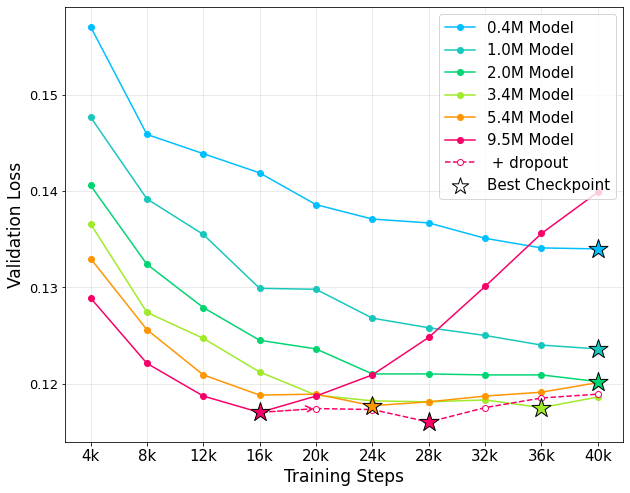

In [9]:
plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 15,
                     'ytick.labelsize': 13,
                     'legend.fontsize': 15
                     })
fig = plt.figure(figsize=(10,8))
val_step = np.arange(1,val_loss.shape[1]+1)*4000
for i, (loss,color,model_size) in enumerate(zip(val_loss,colors,["0.4M","1.0M","2.0M","3.4M","5.4M","9.5M"])):
    plt.plot(val_step, loss, "-o",color=color, label=f"{model_size} Model")
    best_idx = np.argmin(loss)
    plt.scatter(val_step[best_idx], loss[best_idx], color=color,s=400,marker="*",edgecolors="black",zorder=4)
    #plt.scatter(val_step, loss, color=color,s=50,zorder=3)

plt.plot(val_step[4:], val_loss_dropout[0],linestyle="dashed",marker="o",markerfacecolor='white',color=colors[len(val_loss)-1], label=f" + dropout")
best_idx_ = np.argmin(val_loss_dropout[0])
plt.scatter(val_step[4+best_idx_], val_loss_dropout[0][best_idx_], color="#FF0067",s=400,marker="*",edgecolors="black",zorder=4)
plt.annotate("",(val_step[4], val_loss_dropout[0][0]),
             (val_step[best_idx], loss[best_idx]),
             arrowprops=dict(arrowstyle='->',color='#FF0067',lw=1.5,linestyle="dashed"))

plt.scatter([],[],s=300,marker="*",edgecolors="black",color="white",label="Best Checkpoint")
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(val_step, [str(int(vs/1000))+"k" for vs in val_step])
plt.xlabel("Training Steps")
plt.ylabel("Validation Loss")
fig.savefig(f"{out_path}/val_loss_vs_train_step.png",bbox_inches='tight', dpi=200)

In [10]:
fn="mean_loss_x_vs_t.npy"
folder = ["gen_pred_tiny_x_pred","gen_pred_small_x_pred"]

x0_pred_loss_x_pred = []
for f in folder:
    fp = os.path.join(root,f,fn)
    loss = np.load(fp)
    x0_pred_loss_x_pred.append(loss[-1])

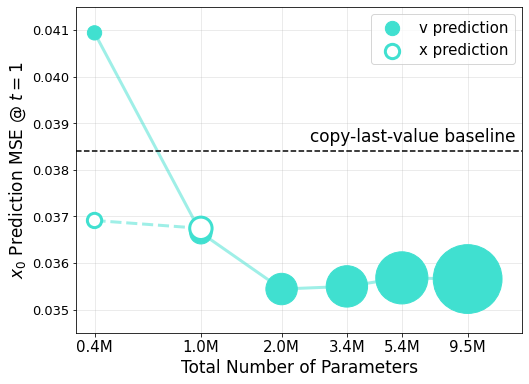

In [11]:
fn="mean_loss_x_vs_t.npy"
folder = ["gen_pred_tiny_fix2","gen_pred_small","gen_pred_medium_fix","gen_pred_large","gen_pred_XL","gen_pred_XXL"]

x0_pred_loss = []
for f in folder:
    fp = os.path.join(root,f,fn)
    loss = np.load(fp)
    x0_pred_loss.append(loss[-1])

plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 15,
                     'ytick.labelsize': 13,
                     'legend.fontsize': 15
                     })
fig = plt.figure(figsize=(8,6))
plt.scatter(total_params, x0_pred_loss, color="#40E0D0",s=total_params/2000,zorder=3)
plt.plot(total_params, x0_pred_loss, color="#40E0D0",alpha=0.5,linewidth=3)
plt.scatter(total_params[:len(x0_pred_loss_x_pred)], x0_pred_loss_x_pred, color="#FFFFFF", edgecolors="#40E0D0",s=total_params[:len(x0_pred_loss_x_pred)]/2000,linewidths=3,zorder=3)
plt.plot(total_params[:len(x0_pred_loss_x_pred)], x0_pred_loss_x_pred, color="#40E0D0",alpha=0.5,linewidth=3,linestyle="dashed")
plt.scatter([],[], color="#40E0D0",s=total_params[0]/2000,zorder=3,label="v prediction")
plt.scatter([],[], color="#FFFFFF", edgecolors="#40E0D0", s=total_params[0]/2000,linewidths=3,label="x prediction")

plt.hlines(0.0384,3.5e5,1.5e7, colors='#000000', linestyles='dashed')
plt.text(2.5e6,0.0386,"copy-last-value baseline")
plt.ylim(0.0345,0.0415)
plt.xscale("log")
plt.xlim(3.5e5,1.5e7)
plt.xticks(total_params, ["0.4M","1.0M","2.0M","3.4M","5.4M","9.5M"])
plt.minorticks_off()
plt.grid(alpha=0.3)
plt.xlabel("Total Number of Parameters")
plt.ylabel("$x_0$ Prediction MSE @ $t=1$")
plt.legend()
fig.savefig(f"{out_path}/x0_pred_scaling.png",bbox_inches='tight', dpi=200)

In [12]:
fp="gen_pred_large/train_loss.npy"
data = np.load(os.path.join(root,fp))
data.shape

(40000,)

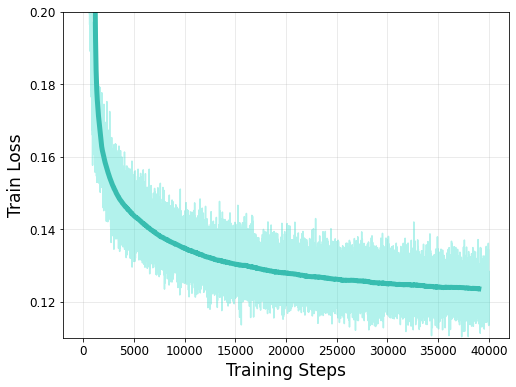

In [13]:
plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 12,
                     'ytick.labelsize': 12,
                     'legend.fontsize': 15
                     })
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(1,data.shape[0]+1),data, color="#40E0D066")
window_size=1000
smoothed = np.convolve(data, np.ones(window_size*2+1)/(window_size*2+1), mode='valid')
plt.plot(np.arange(window_size, window_size+smoothed.shape[0]), smoothed, lw=5,color="#38BDB0")

plt.ylim(0.11,0.2)
plt.xlabel("Training Steps")
plt.ylabel("Train Loss")
plt.grid(alpha=0.3)
fig.savefig(f"{out_path}/learning_curve.png",bbox_inches='tight', dpi=200)